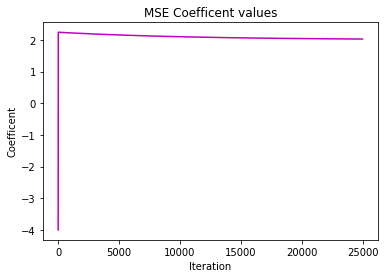

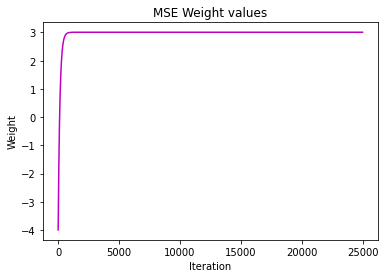

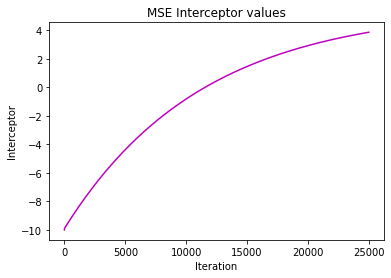

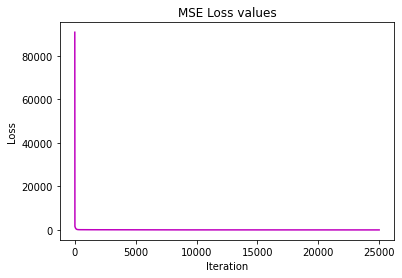

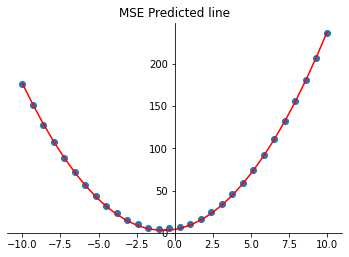

In [10]:
# ----- Imports ----- #
import numpy as np
import random
import matplotlib.pyplot as plt

#---- This is the function that is in charge of the gradient calculations ---- #
# The function recives a,b,c values x,y arrays of points cordinates ,l - the learning rate, f - flag that tells us what loss function to use 0- MSE, 1 - MAE
# The function returns none
def gradient(a,b,c,x,l,y,f):
  n = len(x) # our formulas use mean hence we need to know how many samples we have
  cost = 0 
  a_v = []
  b_v = []
  c_v = []
  costs = []
  for i in range(25000): # We chose to run 25000 iterations
    y_pred = (a*(x**2) + b*(x)+c)  # The current predicted value of y, casting to float64 to increase the amount of numbers we can use
    a_v.append(a)
    b_v.append(b)
    c_v.append(c)
    cost = np.abs(sum(y - y_pred)) / n # Cost function for MAE
    if(f == 1 and sum(y- y_pred) > 0): # If we are using MAE we check if the derivative is positive or negative
      D_a = (1/n) * sum(-x**2 * (y - y_pred))  # Derivative of MAE positive sum * partial derivative of a
      D_b = (1/n) * sum(-x * (y - y_pred))   # Derivative of MAE positive sum * partial derivative of b
      D_c = (1/n) * sum((y - y_pred)*(-1))   # Derivative of MAE positive sum * partial derivative of c
    elif(f == 1 and sum(y- y_pred) < 0):
      D_a = (1/n) * sum(x**2 * (y - y_pred))  # Derivative of MAE negative sum * partial derivative of a
      D_b = (1/n) * sum(x * (y - y_pred))   # Derivative of MAE negative sum * partial derivative of b
      D_c = (1/n) * sum(y - y_pred)   # Derivative of MAE negative sum * partial derivative of c
    elif(f == 1 and sum(y-y_pred) == 0): # If the sum is 0 there is no derivative hence all is 0
      D_a = 0  
      D_b = 0 
      D_c = 0 
    else: # We are using MSE
      D_a = ((-2/n) * sum(x**2 * (y - y_pred)))  # Derivative of MSE * partial derivative of a
      D_b = (-2/n) * sum(x * (y - y_pred))  # Derivative of MSE * partial drivative of b
      D_c = (-2/n) * sum(y - y_pred)  # Derivative of MSE * parital derivative of c
      cost = (sum((y-y_pred)**2) /n) #  MSE loss function
    a = a - (l * D_a)  # Update a
    b = b - (l * D_b)  # Update b
    c = c - (l * D_c) # update c
    costs.append(cost)
    if(cost < 0.000001 or (costs[len(costs)-2] - costs[len(costs)-1] < 0.0000001): # Stopping condition, check the current loss function value or the difference between the last 2 iterations is under our threshold.
      break
  plotting(a_v,b_v,c_v, costs,f)
  plotting_line(a*(x**2) + b*(x)+c,f)

# ---- The function is plotting asked graphs ---- #
def plotting(a_values,b_values,c_values, cost_values,f):
  func = "MSE"
  if(f == 1):
    func ="MAE"
  iteration = [i for i in range(0,len(cost_values))] # Get the number of iterations
  # --- Coefficent values graph ---- #
  plt.plot(iteration, a_values, color = "m")
  plt.title(func+ " Coefficent values")
  plt.xlabel("Iteration")
  plt.ylabel("Coefficent")
  plt.show()
  # ---- Weight values graph ---- #
  plt.plot(iteration ,b_values ,color = "m")
  plt.title(func +" Weight values")
  plt.xlabel("Iteration")
  plt.ylabel("Weight")
  plt.show()
  # ---- Interceptor values graph ---- #
  plt.plot(iteration, c_values, color = "m")
  plt.title(func+" Interceptor values")
  plt.xlabel("Iteration")
  plt.ylabel("Interceptor")
  plt.show()
  # ---- Loss values graph ---- #
  plt.plot(iteration, cost_values, color = "m")
  plt.title(func+" Loss values")
  plt.xlabel("Iteration")
  plt.ylabel("Loss")
  plt.show()

# ---- This function plot the graph of the predicted line after the gradient descent process ---- #

def plotting_line(line,f):
  func = "MSE"
  if(f == 1):
    func = "MAE"
  # ---- Plotting the graph with the values we recived from the gradient decsent process ---- #
  ax = plt.gca()
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  plt.title(func + " Predicted line")
  # ---- Creating axis ---- # 
  ax.scatter(x, y_hat) 
  ax.plot(x, line, 'r') 
  plt.show()

# ---- End of functions ---- #

# --- polynom 2*(x**2) + 3*(x) + 5 --- #
x= np.linspace(-10, 10,30) # Randomize x values
y = np.array([2*(i**2)+3*i +5 for i in x],dtype=np.float64) # Calculate their y values
noise = np.random.uniform(0, 1,len(x)) # Randomize noise values
y_hat = y + noise # Add them to the y values
a = np.random.randint(-10, 10)
b = np.random.randint(-10, 10)
c = np.random.randint(-10, 10)
l = 0.0001 
# ---- Setting first a,b and c values and setting learning rate value ---- #
# ---- Performing Gradient Descent with MSE function ---- #
gradient(a,b,c,x,l,y_hat,0)

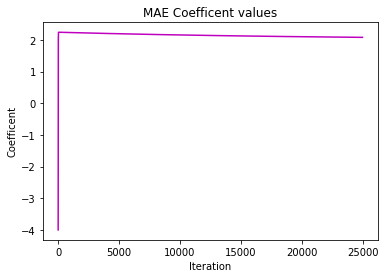

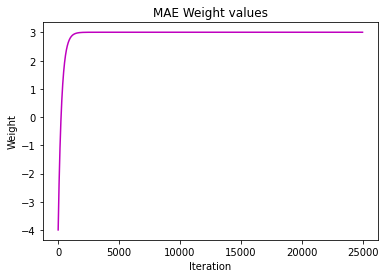

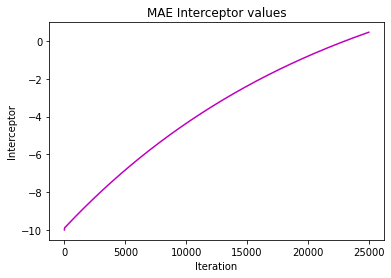

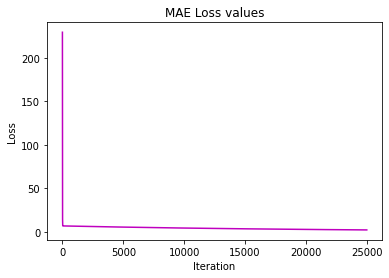

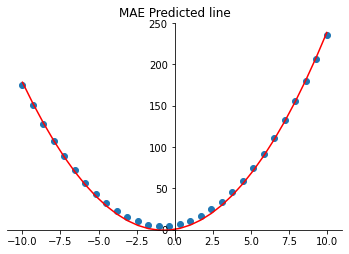

In [11]:
gradient(a,b,c,x,l,y_hat,1)